# 🎭 Face Recognition Using PCA and SVM (Eigenfaces Approach)

This project implements a classical face recognition pipeline using the LFW dataset. It leverages **PCA** to extract meaningful facial patterns (Eigenfaces) and trains an **SVM classifier** to identify individuals.

> ✅ Techniques Used: PCA, Eigenfaces, SVM, Dimensionality Reduction, Image Flattening


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report



<h4> Load the Face Dataset</h4>

In [23]:
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(faces.images.shape)  # (n_samples, height, width)
print(faces.target_names)  # Names of people


(1288, 50, 37)
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


<h4>Prepare Features and Labels</h4>

In [29]:
X = faces.data                  # Flattened image data (X)
y = faces.target                # Labels (y)


<h4>Visualize Sample Faces</h4>

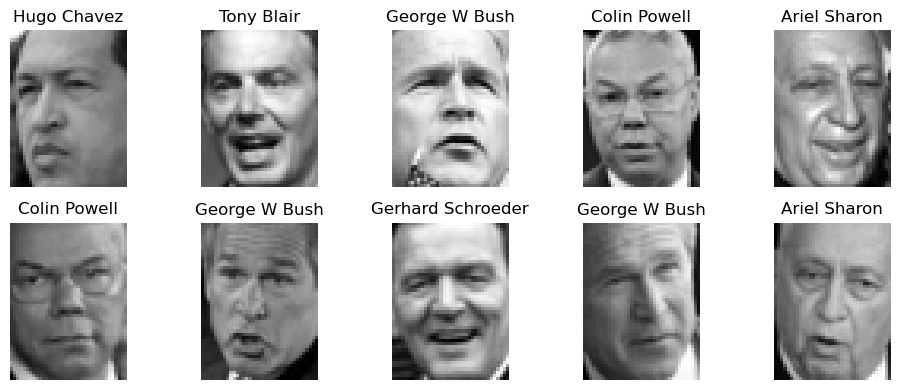

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='gray')
    ax.set_title(faces.target_names[faces.target[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()


<h4>Visualize Sample Faces</h4>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


<h4>Standardize Features (Very Important for PCA)</h4>


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h4> Apply PCA for Dimensionality Reduction</h4>

In [37]:
pca = PCA(n_components=150, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("Reduced shape:", X_train_pca.shape)


Original shape: (966, 1850)
Reduced shape: (966, 150)


<h4>Train the Classifier (SVM)</h4>

In [39]:
clf = SVC(kernel='rbf', class_weight='balanced', probability=True)
clf.fit(X_train_pca, y_train)


SVC(class_weight='balanced', probability=True)

<h4> Make Predictions</h4>

In [41]:
y_pred = clf.predict(X_test_pca)


<h4>Visualize Predictions vs Reality</h4>

In [ ]:
<h4> Evaluate the Model</h4>

In [47]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=faces.target_names))


[[  8   3   0   2   0   0   0]
 [  1  58   0   1   0   0   0]
 [  0   8  16   3   0   0   0]
 [  0  11   0 135   0   0   0]
 [  0   2   0   3  19   0   1]
 [  0   7   0   0   1   7   0]
 [  0   3   2   3   0   0  28]]
                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.62      0.73        13
     Colin Powell       0.63      0.97      0.76        60
  Donald Rumsfeld       0.89      0.59      0.71        27
    George W Bush       0.92      0.92      0.92       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.84       322
        macro avg       0.89      0.73      0.78       322
     weighted avg       0.87      0.84      0.84       322



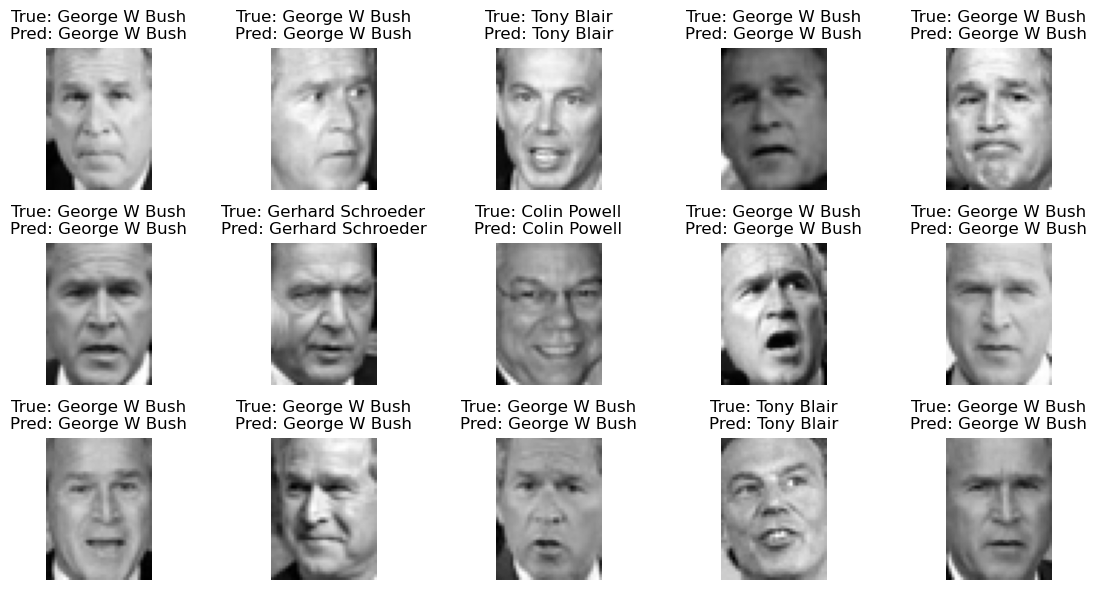

In [49]:
fig, axes = plt.subplots(3, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(faces.images.shape[1:]), cmap='gray')
    ax.set_title(f"True: {faces.target_names[y_test[i]]}\nPred: {faces.target_names[y_pred[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


<h3>📌 Face Recognition Using PCA and SVM (Eigenfaces Approach)</h3>
This project demonstrates a classical Machine Learning approach to face recognition using the LFW (Labeled Faces in the Wild) dataset. It combines:

🔹 Principal Component Analysis (PCA) to reduce high-dimensional face image data into meaningful lower-dimensional components, often referred to as Eigenfaces.

🔹 Support Vector Machine (SVM) as a classifier to recognize and distinguish between different individuals based on their facial features.

The model is trained to identify celebrities from grayscale face images and performs classification on unseen test images. This project showcases the effectiveness of unsupervised feature extraction combined with supervised classification in real-world image processing.

✅ Key Concepts: Dimensionality Reduction, Eigenfaces, Image Flattening, Face Classification, Machine Learning Pipeline

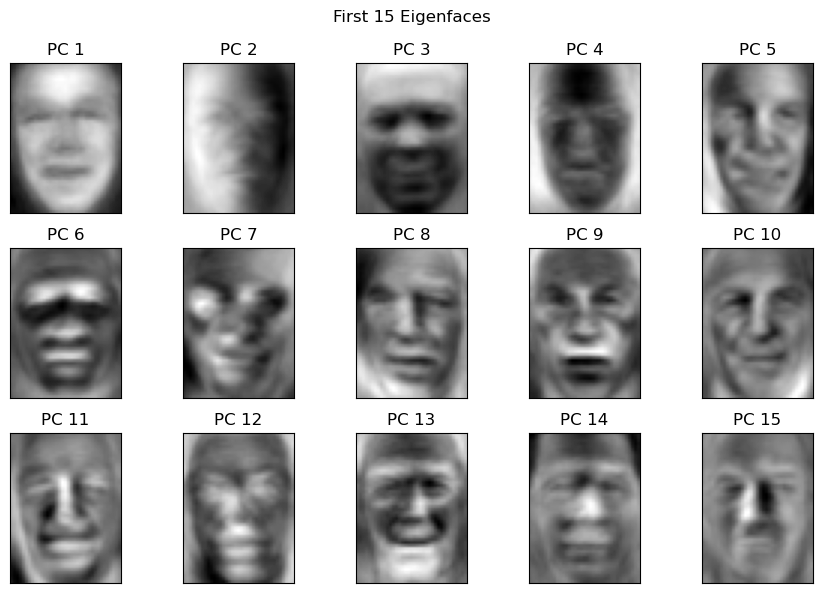

In [17]:
# 

"""
🧠 PCA Face Recognition Model

This face recognition model is built using Principal Component Analysis (PCA) for dimensionality reduction and Support Vector Classifier (SVC) for prediction. It uses the LFW dataset containing labeled face images. PCA helps extract the most significant facial features (called Eigenfaces), and SVC classifies them to recognize different persons.

Model Workflow:
- Load and preprocess face image data
- Scale features and reduce dimensions using PCA
- Visualize important face features (eigenfaces)
- Classify using SVC
- Evaluate with confusion matrix and classification report

This model shows the power of PCA in visual pattern recognition tasks like face identification.
"""
